# CS 5190 Final Project
# Johnson Wei (004150718)

### Task 1: implementing goodFeaturesToTrack
Two corner types are: 
(1) Harris Corners
(2) KLT Corners

#### Note:
Please adjust the 'img_str' variable accordingly to your own directory path.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

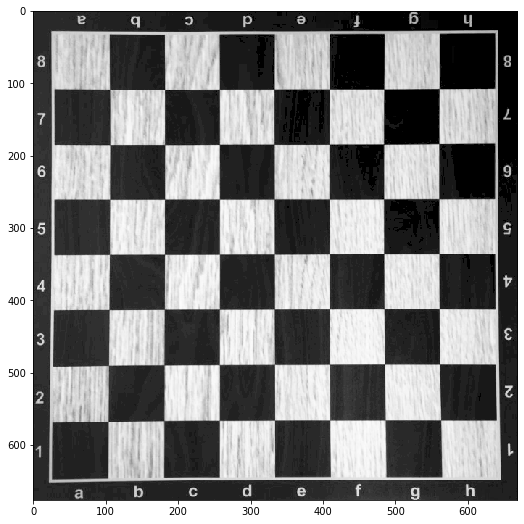

In [4]:
# Windows OS directory-path string format
img_str = r"C:\Users\Johnson\Desktop\5190\workspace\images\chessboard.png"

# img = cv2.imread(img_str).astype('float32')
# convert an image to grayscale
img = cv2.imread(img_str,0)
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.rcParams["figure.figsize"] = [9, 9]
plt.imshow(img, cmap='Greys_r')
plt.show()

In [5]:
# get the x-derivatives
def getGradientX(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    return sobel_x

# get the y-derivatives
def getGradientY(img):
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    return sobel_y

# image gradient x
f_x = getGradientX(img)

# image gradient y
f_y = getGradientY(img)

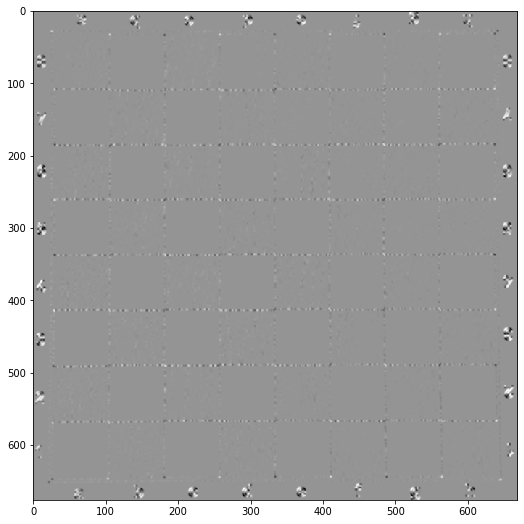

In [6]:
# compute H via Gaussian filtering
kernel = (3,3)
f_xx = cv2.GaussianBlur(f_x**2,kernel,1)
f_xy = cv2.GaussianBlur(f_x*f_y,kernel,1)
f_yy = cv2.GaussianBlur(f_y**2,kernel,1)

plt.imshow(f_xy, cmap='Greys_r')
plt.show()

In [7]:
# computing cornerness response with formula from lecture slides
# C = det(H) - k(trace(H))**2

# usual value of k 
k = 0.04 

# determinant of H
det_H = f_xx * f_yy - f_xy**2

# trace of H
trace_H = f_xx + f_yy

# cornerness response will represent the matrix referred to as 'C' from the lecture slides
cornerness_response = det_H - k * trace_H**2

In [17]:
# image: np array representing colored-image source (jpg, png, etc,.)
# maxCorners: maximum number of corners desired
# qualityLevel: minimal accepted quality of image corners
# cornerType: by default is set to Harris corner method, if False is indicated, then KLT corner method will result.
def myGoodFeaturesToTrack(image, quality_level, cornerType=True):
    color_img = image.copy()
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    
    block_size = 3
    aperture_size = 3 # corresponds to the kth size of Sobel operator
    
    max_quality_level = 100
    
    if cornerType == False: # KLT corner method
        print('detecting KLT corners')
        # cv2.cornerMinEigenVal(...) will calculate the min eigenvalue of gradient matrices for corner detection
        # from the lecture slides we follow KLT characteristics: min(lambda_1, lambda_2) > threshold
        klt_matrix = cv2.cornerMinEigenVal(gray_img, block_size, aperture_size)

        # get min & max values of KLT features
        min_val, max_val, _, _ = cv2.minMaxLoc(klt_matrix) 
        
        # set matrix to representing cornerType
        corner_matrix = klt_matrix  
        
    else: # cornerType == Harris corner method
        print('detecting Harris corners')
        # get image gradient x
        f_x = getGradientX(img)

        # get image gradient y
        f_y = getGradientY(img)
        
        # compute H-matrix via Gaussian filtering
        kernel = (3,3)
        f_xx = cv2.GaussianBlur(f_x**2,kernel,1)
        f_xy = cv2.GaussianBlur(f_x*f_y,kernel,1)
        f_yy = cv2.GaussianBlur(f_y**2,kernel,1)
        
        # computing cornerness response with formula from lecture slides
        # C = det(H) - k(trace(H))**2

        # usual value of k 
        k = 0.04 

        # determinant of H
        det_H = f_xx * f_yy - f_xy**2

        # trace of H
        trace_H = f_xx + f_yy

        # cornerness response will represent the matrix referred to as 'C' from the lecture slides
        cornerness_response = det_H - k * trace_H**2
        
        # get min & max values of Harris features from 'C' (cornerness response matrix)
        min_val, max_val, _, _ = cv2.minMaxLoc(cornerness_response)
        
        # set matrix to represent cornerType
        corner_matrix = cornerness_response
    
    # determining a KLT corner: ( min(lambda_1, lambda_2) > threshold ) or...
    # Harris corner if the conditions are met
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            if corner_matrix[i,j] > min_val + (max_val - min_val) * quality_level/max_quality_level:
                cv2.circle(color_img, (j,i),4, (0,0,255), cv2.FILLED)
    
    # display detected corners
#     plt.imshow(color_img)
#     plt.show()
    
    return color_img

#### Note:
Please adjust the cv2.imwrite function to reflect your own directory path.

In [18]:
color_img = cv2.imread(img_str)
# if cornerType==True then corner-type is Harris-corner, otherwise KLT-corner
resultHarris = myGoodFeaturesToTrack(color_img, quality_level=40, cornerType=True)

# save my Harris corner to disk
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\final\myHarrisCornerResult.jpg", resultHarris)

detecting Harris corners


True

In [19]:
color_img = cv2.imread(img_str)
# if cornerType==True then corner-type is Harris-corner, otherwise KLT-corner
resultKLT = myGoodFeaturesToTrack(color_img, quality_level=40, cornerType=False)

# save my Harris corner to disk
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\final\myKLTCornerResult.jpg", resultKLT)

detecting KLT corners


True

###  Task 2: Comparison of my implementation vs. cv2.goodFeaturesToTrack()
displaying cv2.goodFeaturesToTrack(...) results below

In [28]:
# function that simplifies running cv2.goodFeaturesToTrack
def getGoodFeatures(img, useHarris=True):
    my_img = img.copy()
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY).astype('float32')
    
    # converting image to gray for good features function
    corners = cv2.goodFeaturesToTrack(gray,400,0.4,10,mask=None,blockSize=3,useHarrisDetector=useHarris)
    corners = np.int0(corners)
    
    result = img1.copy()
    for i in corners:
        x,y = i.ravel()
        cv2.circle(result,(x,y),3,(0,0,255),10)

    return result

#### Note:
Adjust cv2.imwrite args accordingly to your own directory path.

In [29]:
myImage = cv2.imread(img_str)

resultHarris = getGoodFeatures(myImage, useHarris=True)
resultKLT = getGoodFeatures(myImage, useHarris=False)

# saving results of good features using Harris corners
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\final\actualHarris.jpg", resultHarris)

# saving results using KLT corners
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\final\actualKLT.jpg", resultKLT)

True

### Task 3: Using cv2.calcOpticalFlowPyrLK() to estimate sparse optical flows of attached video
Removing corners that have negligible small motions

In order to execute this program, you must adjust the variable 'video_path' according to your own directory path; you must also check if you have enough memory space to save the video file.

In [30]:
video_path = r"C:\Users\Johnson\Desktop\5190\assignments\final project\vtest.avi"

#### Note: 
If you wish to stop the video after execution, press the esc key.

In [31]:
# Combining background subtraction with optical flow pyr LK

# Preparing to save processed video into a file
# indicates the type of format of video
fourcc = cv2.VideoWriter_fourcc('X','V','I','D') 
# desired video dimension
vid_dim = (1100,600) #1280,720
# saves video as output.avi in current dir
out = cv2.VideoWriter("output.avi", fourcc, 5.0, vid_dim) 

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15), # original: (15,15)
                  maxLevel = 5, # originally 2
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Generate random colors
color = np.random.randint(0,255,(100,3))

cap = cv2.VideoCapture(video_path)
# this kernel will help me with processing my foreground mask image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
# we will utilize a background subtractor object to help us generate a mask
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

_, old_frame = cap.read()
fgmask = fgbg.apply(old_frame) # apply outside of the while loop to initiate it

while True:
    _, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    
    fgmask = fgbg.apply(old_frame)
    # apply morphological technique: opening; erosion followed by dilation
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    # track good features to be used in conjunction with optical flow
    p0 = cv2.goodFeaturesToTrack(fgmask, mask = None, **feature_params)
    
    _, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # calculate optical flow with the processed mask-image
    p1, st, err = cv2.calcOpticalFlowPyrLK(fgmask, frame_gray, p0, None, **lk_params)

    corners = cv2.goodFeaturesToTrack(fgmask,mask=None,**feature_params)
    
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    
    # draw red dots in every frame
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)

    # create test frame to view any descrepancies that may arise
    _, test_frame = cap.read()
    if type(corners) != 'NoneType':
        for i in corners:
            x,y = i.ravel()
            frame = cv2.circle(test_frame,(x,y),3,(0,0,255),-1)

    cv2.imshow('Frame', frame)
    cv2.imshow('test frame', test_frame)
    cv2.imshow('FG MASK Frame', fgmask)
    
    vid_image = cv2.resize(frame, vid_dim)
    out.write(vid_image)

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break
        
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    
cap.release()
cv2.destroyAllWindows()

The resultant video file for task 3 can be accessed here via google drive: 
https://drive.google.com/file/d/1OhdyGujs2LlCAc75WQWM-0DuSeERv2iD/view?usp=sharing 

### Task #3 Results:
By using the cv2.calcOpticalFlowPyrLK(...) function, I was able to represent sparse optical movement without including the corners that had negligible small motions. You will notice that the caution tape in the video sways due to natural environmental winds. Occassionally, the caution tape movement is represented as part of the sparse optical flow.